In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
#pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

In [77]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [78]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [79]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom. Kolom pada dataset tersebut memiliki tipe data yang beragam, yaitu: integer, object, dan float. Jumlah maksimal baris untuk setiap kolom sebanyak:  550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, maka akan dilakukan proses identifikasi lebih lanjut.



# Deteksi Missing value

In [81]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [82]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga sebanyak 30, kolom rating sebanyak 50, dan kolom jumlah_ulasan sebanyak 20.   

In [83]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

# HANDLING MISSING VALUE

Dalam Machine Learning, missing values adalah masalah umum yang harus ditangani sebelum model dapat digunakan.
Keberadaan missing values dapat mempengaruhi analisis data seperti: menyebabkan analisis bias, mengurangi akurasi analisis, mengurangi statistik deskriptif, menyulitkan pembuatan model prediktif, hingga mempengaruhi visualisasi data.
Ada beberapa metode untuk menangani missing values, tergantung pada jenis data dan karakteristik distribusinya.

## 1. HARGA

In [84]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [40]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

Text(0, 0.5, 'Densitas')

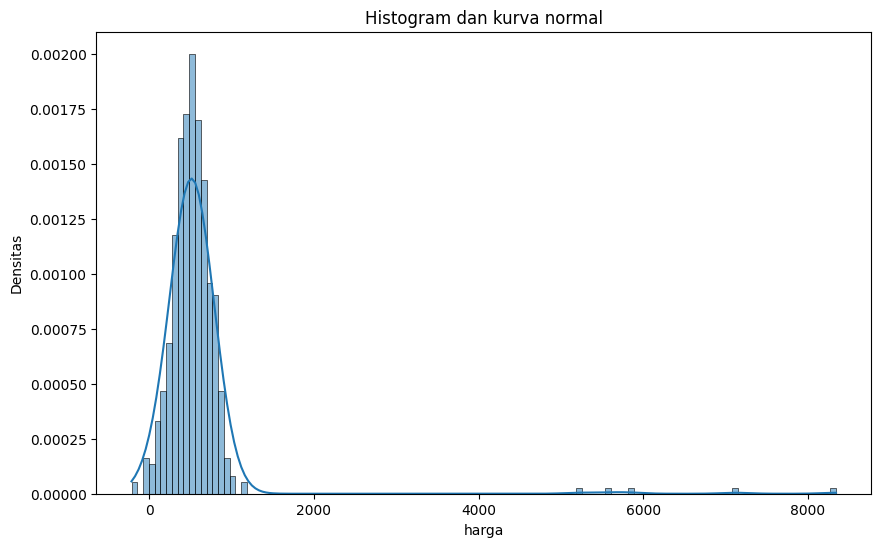

In [85]:
from scipy import stats
import seaborn as sns
df=pd.read_csv('produk_elektronik.csv')
kolom='harga'
plt.figure(figsize=(10, 6))
sns.histplot(df[kolom], kde=True, stat='density')
plt.title('Histogram dan kurva normal')
plt.xlabel(kolom)
plt.ylabel('Densitas')

Berdasarkan output isi kolom harga, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'.
Pada kasus ini, metode yang paling tepat digunakan untuk menangani masalah tersebut yaitu imputasi melalui penggantian masing-masing Missing Values tersebut dengan rata-rata dari harga keseluruhan data.

Metode imputasi tersebut sangat tepat dibanding penghapusan data dikarenakan data cukup penting untuk keakuratan analisis, disamping itu data yang kosong juga hanya sebagian kecil.

Pemilihan rata-rata untuk mengganti data yang kosong lebih disarankan karena berdasarkan kurva kenormalan di atas tidak terjadi kemiringan yang berarti.

In [86]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].mean())

In [87]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

## 2. RATING

In [88]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [89]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

Text(0, 0.5, 'Densitas')

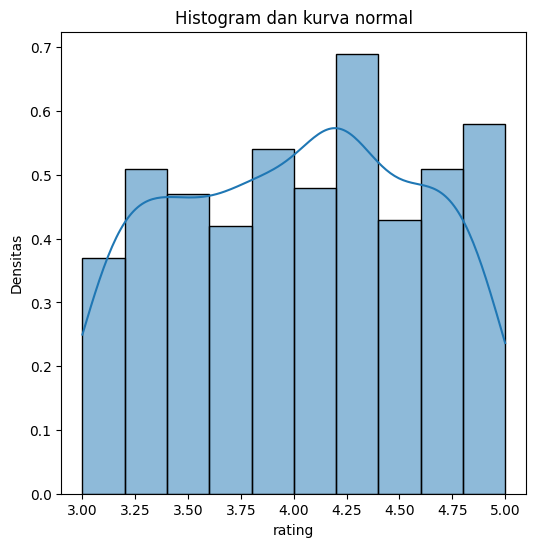

In [90]:
kolom_rating='rating'
plt.figure(figsize=(6, 6))
sns.histplot(df[kolom_rating], kde=True, stat='density')
plt.title('Histogram dan kurva normal')
plt.xlabel(kolom_rating)
plt.ylabel('Densitas')

Berdasarkan output isi kolom rating, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, metode yang paling tepat digunakan untuk menangani masalah tersebut yaitu imputasi melalui penggantian masing-masing Missing Values tersebut dengan modus dari keseluruhan data.

Metode imputasi tersebut sangat tepat dibanding penghapusan data dikarenakan data cukup penting untuk keakuratan analisis, disamping itu data yang kosong juga hanya sebagian kecil.

Pemilihan modus untuk mengganti data yang kosong lebih disarankan karena berdasarkan histogram di atas banyak data pada masing-masing rentang hampir sama.

In [91]:
from scipy.stats import mode
data['rating'].mode()

,rating
0,4.2


In [92]:
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [93]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

## 3. JUMLAH ULASAN

In [94]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [95]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

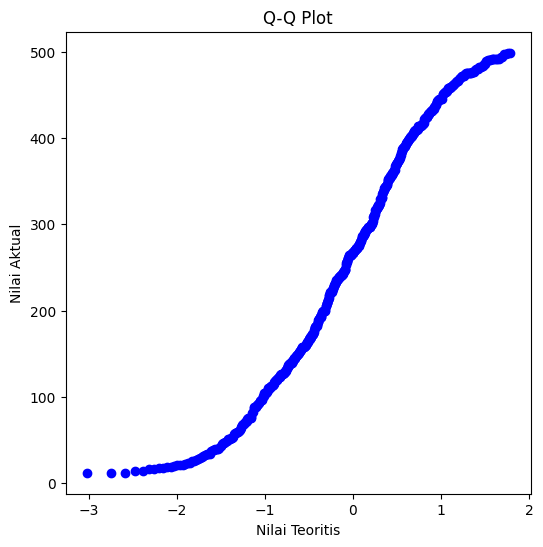

In [96]:
kolom_ulasan='jumlah_ulasan'
plt.figure(figsize=(6, 6))
stats.probplot(df[kolom_ulasan], dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Nilai Teoritis')
plt.ylabel('Nilai Aktual')
plt.show()

Berdasarkan output isi kolom jumlah_ulasan, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, metode yang paling tepat digunakan untuk menangani masalah tersebut yaitu imputasi melalui penggantian masing-masing Missing Values tersebut dengan median dari keseluruhan data.

Metode imputasi tersebut sangat tepat dibanding penghapusan data dikarenakan data cukup penting untuk keakuratan analisis, disamping itu data yang kosong juga hanya sebagian kecil.

Pemilihan median untuk mengganti data yang kosong lebih disarankan karena berdasarkan Q-Q Plot di atas terdapat nilai ekstrim sehingga lebih aman jika menggunakan median.

In [97]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [98]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

0

In [99]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


# CEK DAN PENANGANAN OUTLIER

**Cek Outlier**
Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
2. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Boxplot**

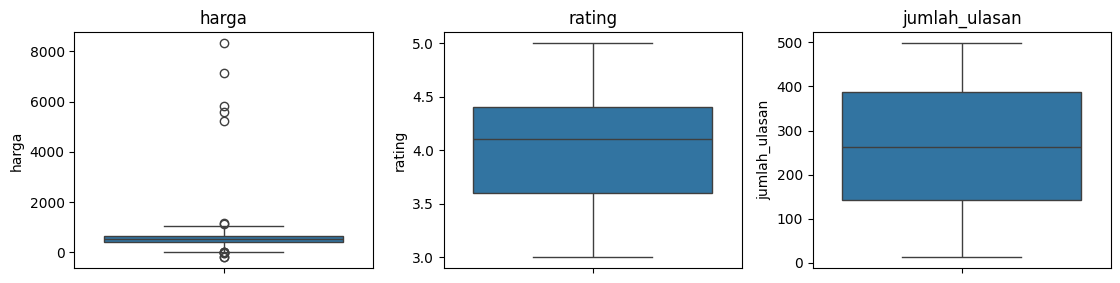

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**2. IQR**

In [102]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Keberadaan outlier dapat memiliki dampak yang signifikan terhadap analisis data. Keberadaan outlier dapat mengubah nilai rata-rata, median, mengubah distribusi data, mengurangi akurasi model, mengubah hasil uji statistik, dan menghambat proses analisis. Sehingga perlu dilakukan penanganan terhadap outlier pada suatu data.

**Penanganan Outlier**

Metode yang paling tepat untuk menangani kasus di atas adalah Winsorizing yaitu Mengganti Outlier dengan Batas IQR. Hal ini dikarenakan keberadaan data sangat penting dan tidak boleh dihapus. Selain itu nilai dari outlier yang ada juga cukup signifikan. Dengan demikian Winsorizing adalah metode yang tepat.

📌 **A. Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [103]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

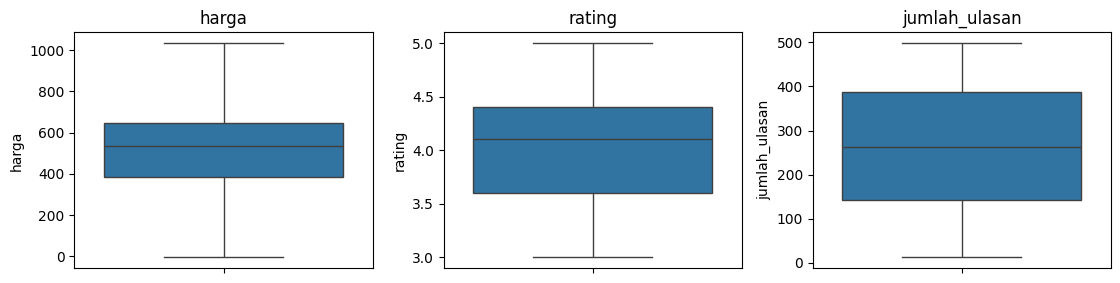

In [105]:
#cek boxplot lagi

num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# ENCODING DATA KATEGORIK

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning. Model Machine Learning umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.

Pada dataset ini, kolom yang memerlukan encoding yaitu kolom kategori dan kolom negara_asal.



🔹**Metode Encoding dalam Machine Learning**
Ada beberapa metode encoding yang umum digunakan, tergantung pada jenis dan karakteristik data kategorik:

1. One-Hot Encoding (OHE): Mengubah kategori menjadi beberapa kolom biner (0/1). Digunakan jika jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.
2. Ordinal Encoding	: Mengubah kategori menjadi angka berurutan (0,1,2,..). Digunakan jika kategori memiliki urutan yang jelas (misalnya pendidikan: SD < SMP < SMA)
3. Target Encoding	: Menggunakan rata-rata target (misalnya rata-rata skor IMDB berdasarkan negara) untuk mengganti kategori. Digunakan jika data memiliki hubungan statistik yang kuat dengan target.


In [106]:
#melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

Metode yang sesuai untuk kasus di atas adalah Target Encoding dengan menggunakan tipe elektronik untuk mengganti kategori. Hal ini sesuai karena jumlah kategori cukup banyak dan data memiliki hubungan dengan target

In [121]:
# Buat dictionary untuk mapping kategori ke tipe
kategori_to_tipe = {
    'Smartwatch': 'Portable', 'Headphone': 'Portable', 'Tablet': 'Komputer', 'Laptop': 'Komputer',
    'Camera': 'Fotografi', 'Smartphone': 'Portable',
}

# Ubah negara menjadi region
data['kategori_tipe'] = data['kategori'].map(kategori_to_tipe).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['kategori_tipe'], prefix='tipe')

In [122]:
#melihat isi dalam kolom
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

Metode yang sesuai untuk kasus di atas adalah Target Encoding dengan menggunakan regional untuk mengganti kategori. Hal ini sesuai karena jumlah kategori cukup banyak dan data memiliki hubungan dengan target

In [123]:
# Buat dictionary untuk mapping negara ke region
negara_asal_to_region = {
    'Japan': 'Asia', 'Canada': 'America', 'South Korea': 'Asia', 'France': 'Europe', 'USA': 'America', 'Germany': 'Europe', 'China': 'Asia',
    'India': 'Asia', 'UK': 'Europe',
}

# Ubah negara menjadi region
data['negara_asal_region'] = data['negara_asal'].map(negara_asal_to_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['negara_asal_region'], prefix='region')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   produk_id       550 non-null    int64  
 1   nama_produk     550 non-null    object 
 2   kategori        550 non-null    object 
 3   harga           550 non-null    float64
 4   rating          550 non-null    float64
 5   jumlah_ulasan   550 non-null    float64
 6   negara_asal     550 non-null    object 
 7   tipe_Fotografi  550 non-null    bool   
 8   tipe_Komputer   550 non-null    bool   
 9   tipe_Portable   550 non-null    bool   
 10  region_America  550 non-null    bool   
 11  region_Asia     550 non-null    bool   
 12  region_Europe   550 non-null    bool   
dtypes: bool(6), float64(3), int64(1), object(3)
memory usage: 33.4+ KB
